# Objective

Highlight typical analysis that can be done on experimental data, replicated from [here](https://bookdown.org/content/1340/basic-data-analysis-experiments.html)

In [28]:
library(tidyverse)
library(readxl)
library(psych)
library(ggpubr)
library(type3anova)

In [25]:
download.file('http://users.telenet.be/samuelfranssens/tutorial_data/power_conspicuous_consumption.xlsx',
              '~/ml-projects/regresion-tutorial/power_conspicuous_consumption.xlsx')

Warning message in download.file("http://users.telenet.be/samuelfranssens/tutorial_data/power_conspicuous_consumption.xlsx", :
“URL http://users.telenet.be/samuelfranssens/tutorial_data/power_conspicuous_consumption.xlsx: cannot open destfile '~/ml-projects/regresion-tutorial/power_conspicuous_consumption.xlsx', reason 'No such file or directory'”Warning message in download.file("http://users.telenet.be/samuelfranssens/tutorial_data/power_conspicuous_consumption.xlsx", :
“download had nonzero exit status”

In [4]:
powercc = read_excel('power_conspicuous_consumption.xlsx')

In [5]:
glimpse(powercc)

Observations: 147
Variables: 39
$ subject        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ start_date     <dttm> 2012-04-19 09:32:56, 2012-04-19 09:31:26, 2012-04-19 …
$ end_date       <dttm> 2012-04-19 09:49:42, 2012-04-19 09:51:13, 2012-04-19 …
$ duration       <dbl> 1006, 1187, 1400, 1616, 2006, 1668, 2455, 2354, 1071, …
$ finished       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ power          <chr> "high", "low", "low", "low", "high", "high", "low", "h…
$ audience       <chr> "public", "public", "public", "public", "public", "pub…
$ group_size     <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, …
$ gender         <chr> "male", "male", "male", "male", "male", "male", "male"…
$ age            <dbl> 18, 18, 19, 18, 18, 20, 19, 19, 18, 18, 19, 18, 18, 19…
$ dominance1     <dbl> 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, …
$ dominance2     <dbl> 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, …
$ dominance3     <db

In [6]:
powercc %>%
    mutate(subject = factor(subject),
           power = factor(power, levels = c('low', 'high')),
           audience = factor(audience, levels = c('private', 'public'))) ->
    powercc

In [7]:
powercc %>%
    filter(finished == 1) ->
    powercc

In [12]:
powercc %>%
    select(starts_with('dominance')) %>%
    alpha()


Reliability analysis   
Call: alpha(x = .)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.69      0.67    0.67      0.23 2.1 0.038 0.63 0.27     0.21

 lower alpha upper     95% confidence boundaries
0.61 0.69 0.76 

 Reliability if an item is dropped:
           raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
dominance1      0.68      0.67    0.66      0.25 2.0    0.039 0.016  0.22
dominance2      0.65      0.63    0.62      0.22 1.7    0.043 0.018  0.21
dominance3      0.59      0.58    0.56      0.19 1.4    0.050 0.014  0.20
dominance4      0.62      0.60    0.59      0.20 1.5    0.047 0.018  0.21
dominance5      0.65      0.64    0.63      0.23 1.7    0.043 0.021  0.21
dominance6      0.70      0.70    0.68      0.28 2.4    0.038 0.009  0.25
dominance7      0.65      0.64    0.62      0.23 1.8    0.043 0.017  0.20

 Item statistics 
             n raw.r std.r r.cor r.drop mean   sd
dominance1 143  0.52  0.49  0.33   0.29 0.53 0.50
domi

In [15]:
powercc %>%
    mutate(dominance = (dominance1 + dominance2 + dominance3 + dominance4 + dominance5 + dominance7)/7,
           cc = (conspicuous1 + conspicuous2 + conspicuous3 + conspicuous4 + conspicuous5)/5,
           icc = (inconspicuous1 + inconspicuous2 + inconspicuous3 + inconspicuous4 + inconspicuous5)/5) %>% 
    select(-starts_with('sa')) ->
    powercc

In [17]:
t.test(dominance ~ gender,
       data = powercc, 
       var.equal = TRUE)


	Two Sample t-test

data:  dominance by gender
t = -0.6553, df = 141, p-value = 0.5133
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.11633858  0.05841294
sample estimates:
mean in group female   mean in group male 
           0.4857143            0.5146771 


In [19]:
t.test(powercc$cc, powercc$icc,
       paired = TRUE)


	Paired t-test

data:  powercc$cc and powercc$icc
t = 25.064, df = 142, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.214575 2.593816
sample estimates:
mean of the differences 
               2.404196 


In [22]:
powercc %>%
    group_by(audience, power) %>%
    summarize(n_samples = n(),
              mean_cc = mean(cc),
              sd_cc = sd(cc))

audience,power,n_samples,mean_cc,sd_cc
<fct>,<fct>,<int>,<dbl>,<dbl>
private,low,34,6.082353,1.0387844
private,high,31,5.632258,0.8930797
public,low,40,6.170000,1.1453809
public,high,38,6.073684,1.0297426


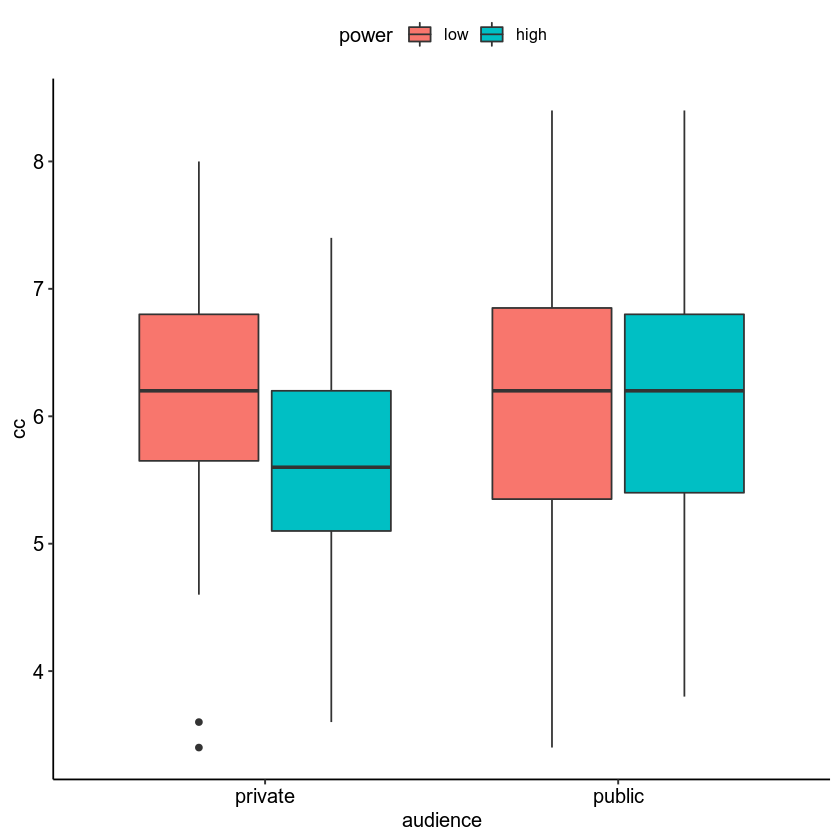

In [27]:
ggplot(powercc, aes(x = audience, y = cc, fill = power)) +
    geom_boxplot() +
    theme_pubr()

In [29]:
model_linear = lm(cc ~ power * audience, data = powercc)

In [30]:
type3anova(model_linear)

term,ss,df1,df2,f,pvalue
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
(Intercept),5080.291778,1,139,4709.783043,0.000
power,2.642501,1,139,2.449782,0.120
audience,2.477470,1,139,2.296786,0.132
power:audience,1.107748,1,139,1.026960,0.313
Residuals,149.934838,139,139,NA,NA


In [33]:
lm(cc ~ age + power * audience, data = powercc) %>%
    type3anova()

term,ss,df1,df2,f,pvalue
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
(Intercept),27.060391,1,138,25.195560,0.000
age,1.720871,1,138,1.602280,0.208
power,1.884690,1,138,1.754809,0.187
audience,2.033152,1,138,1.893040,0.171
power:audience,1.249846,1,138,1.163715,0.283
Residuals,148.213966,138,138,NA,NA


In [ ]:
anova(model_stylized_ce_below_cutoff)